In Statistics is all about working with data, be it processing, analyzing, or drawing a conclusion from the data we have. In the context of a given dataset, statistics has two main goals: describing the data, and drawing conclusions from it. These goals coincide with the two main categories of statistics — descriptive statistics and inferential statistics — respectively.

## Categorical Data 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weather_df = pd.DataFrame({'temp': [55, 34, 80, 75, 53], 'weather': ['windy','cloudy','sunny','rainy','sunny']})
weather_df

,temp,weather
0,55,windy
1,34,cloudy
2,80,sunny
3,75,rainy
4,53,sunny


In [3]:
weather_df['weather_encoded'] = weather_df['weather'].map({'windy': 0, 'cloudy': 1, 'sunny': 2, 'rainy': 3})
weather_df

,temp,weather,weather_encoded
0,55,windy,0
1,34,cloudy,1
2,80,sunny,2
3,75,rainy,3
4,53,sunny,2


In [4]:
pd.get_dummies(weather_df['weather'])

,cloudy,rainy,sunny,windy
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In terms of making predictions, if a categorical attribute is the target of our machine learning pipeline (as in, if we want to predict a categorical attribute), classification models are needed. As opposed to regression models, which make predictions on numerical, continuous data, classification models, or classifiers for short, keep in mind the possible values their target attribute can take and only predict among those values. Thus, when deciding which machine learning model(s) you should train on your dataset to predict categorical data, make sure to only use classifiers.

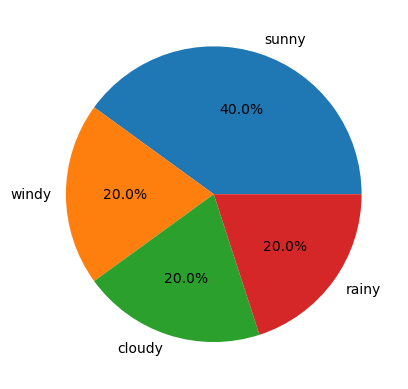

In [5]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [6]:
student_df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dan', 'Eli', 'Fran'],
                           'sex': ['female', 'male','female', 'male', 'male', 'female'],
                           'class': ['FY', 'SO', 'SR', 'SO',' JR', 'SR'],
                           'gpa': [90, 93, 97, 89, 95, 92],'num_classes': [4, 3, 4, 4, 3, 2]})
student_df

,name,sex,class,gpa,num_classes
0,Alice,female,FY,90,4
1,Bob,male,SO,93,3
2,Carol,female,SR,97,4
3,Dan,male,SO,89,4
4,Eli,male,JR,95,3
5,Fran,female,SR,92,2


A binary attribute, whose values can only be True and False, is a categorical attribute whose set of possible values contains the two Boolean values mentioned. Since Boolean values can be easily interpreted by machine learning and mathematical models, there is usually not a need to convert a binary attribute into any other form.

In [7]:
student_df['female_flag'] = student_df['sex'] == 'female'
student_df = student_df.drop('sex', axis=1)
student_df

,name,class,gpa,num_classes,female_flag
0,Alice,FY,90,4,True
1,Bob,SO,93,3,False
2,Carol,SR,97,4,True
3,Dan,SO,89,4,False
4,Eli,JR,95,3,False
5,Fran,SR,92,2,True


In [8]:
import seaborn as sns

In [9]:
weather_df = pd.read_csv('weather_data.csv')
weather_df.head()

,day,city,weather
0,0,St Louis,sunny
1,0,New York,cloudy
2,0,San Francisco,sunny
3,1,New York,rain
4,1,St Louis,cloudy


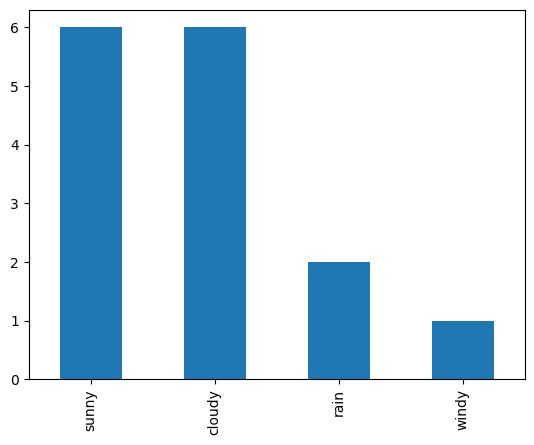

In [10]:
weather_df['weather'].value_counts().plot.bar()
plt.show()

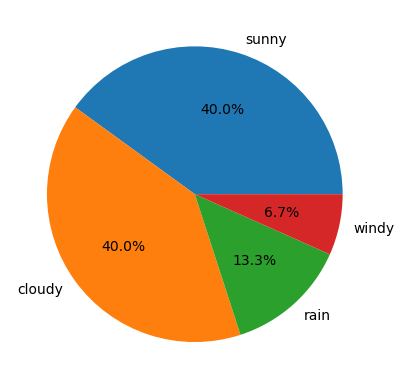

In [11]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [12]:
weather_df.groupby(['weather', 'city'])['weather'].count().unstack('city')

city,New York,San Francisco,St Louis
weather,,,
cloudy,3.0,NaN,3.0
rain,1.0,NaN,1.0
sunny,1.0,4.0,1.0
windy,NaN,1.0,NaN


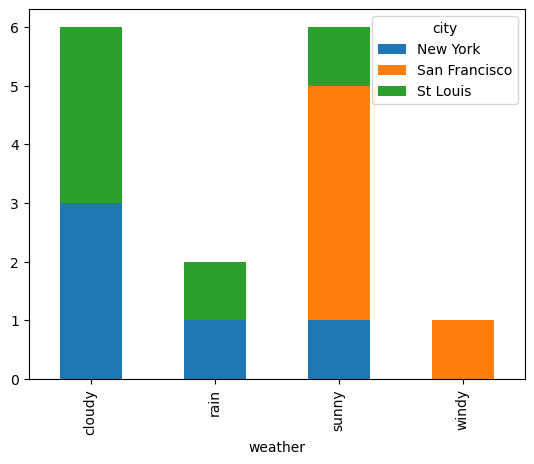

In [13]:
weather_df.groupby(['weather', 'city'])['weather'].count().unstack('city').fillna(0).plot(kind='bar', stacked=True) 
plt.show()

## Numerical Data 

As opposed to a few probability distributions that can be used to model categorical data, there are numerous probability distributions for numerical data. These include the normal distribution (also known as the bell curve distribution), the uniform distribution, the exponential distribution, and many more. Each of these probability distributions is designed to model specific types of data. For example, the normal distribution is typically used to model quantities with linear growth such as age, height, or students' test scores, while the exponential distribution models the amount of time between the occurrences of a given event.

On another topic, many processing techniques can be applied to numerical data. Two of the most common of these include scaling and normalization.

Scaling involves adding and/or multiplying all the values in a numerical attribute by a fixed quantity to scale the range of the original data to another range. This method is used when statistical and machine learning models can only handle values within a given range (for example, positive numbers or numbers between 0 and 1 can be processed and analyzed more easily)

For example, say the data we have in a numerical attribute follows a normal distribution with a mean of 4 and a standard deviation of 10. The following code randomly generates that data synthetically and visualizes it:

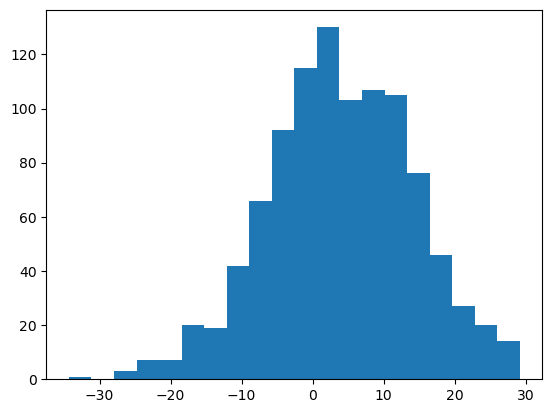

In [14]:
samples = np.random.normal(4, 10, size=1000)
plt.hist(samples, bins=20)
plt.show()

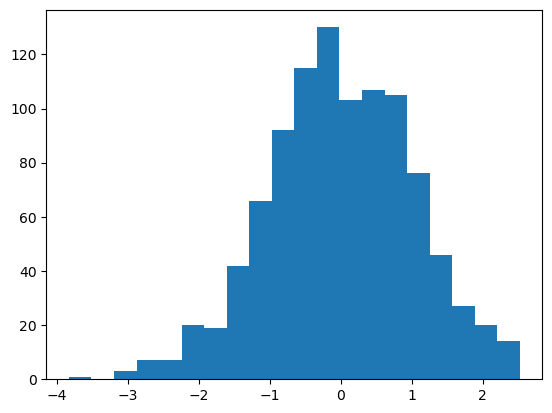

In [15]:
normalized_samples = (samples - 4) / 10
plt.hist(normalized_samples, bins=20)
plt.show()

The mean, which is calculated to be the average of all the values from the probability distribution, is suitable for estimating the center of the distribution. In its standard form, as we have seen, the normal distribution has a mean of 0, indicating that its data revolves around point 0 on the axis.

The standard deviation, on the other hand, represents how much the data points vary from the mean. Without going into much detail, in a normal distribution, it is calculated to be the mean distance from the mean of the distribution. A low-valued standard deviation indicates that the data does not deviate too much from the mean, while a high-valued standard deviation implies that the individual data points are quite different from the mean.

The standard deviation, as we have mentioned, calculates the difference between each data point and the mean of a numerical attribute, squares them, takes their average, and finally takes the square root of the result. The further away the individual data points are from the mean, the larger this quantity gets, and vice versa. This is why it is a good indicator of how dispersed a dataset is.



## Visualizing Probability Density

In [16]:
samples = np.random.normal(size=1000)
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75) 

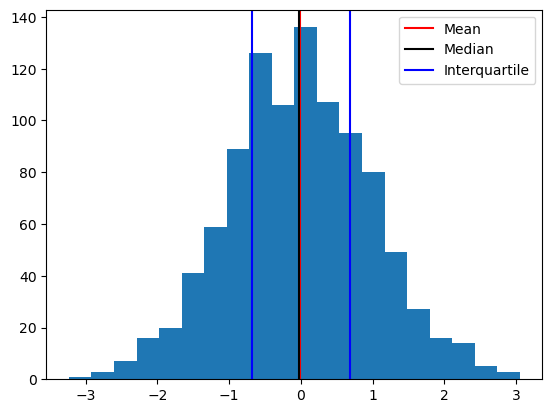

In [17]:
plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

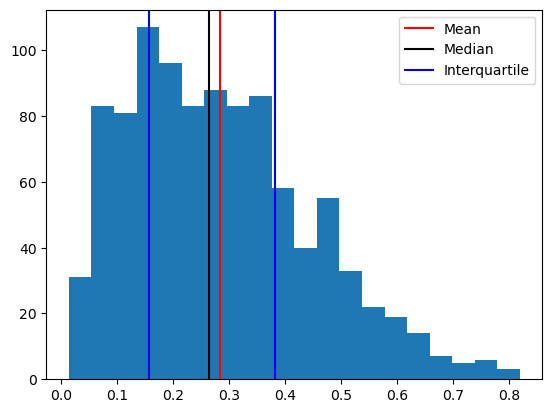

In [18]:
samples = np.random.beta(2, 5, size=1000)
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75)
plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

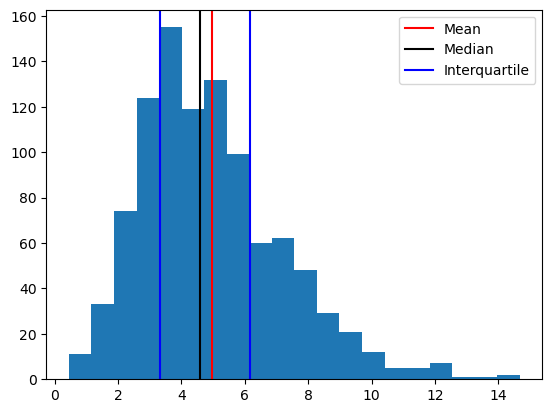

In [19]:
samples = np.random.gamma(5, size=1000)
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75)
plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

In [21]:
df = pd.DataFrame({'numerical': np.random.normal(size=5),'categorical': ['a', 'b', 'a', 'c', 'b'],'ordinal': [1, 2, 3, 5, 4]})

In [ ]:
df.describe(